In [0]:
import tensorflow.keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 320
num_classes = 10
epochs = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'tensorflow.keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
print(model.layers)
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.layers)
# initiate Adam optimizer
opt = tensorflow.keras.optimizers.Adam(lr=0.001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

170500096/170498071 [==============================] - 61s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
[]
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
[<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5942df7c50>, <tensorflow.python.keras.layers.core.Activation object at 0x7f5942df7ba8>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f59432e03c8>, <tensorflow.python.keras.layers.core.Activation object at 0x7f59a82dbfd0>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f594234e6a0>, <tensorflow.python.keras.layers.core.Dropout object at 0x7f59ade47e10>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f594234ea90>, <tensorflow.python.keras.layers.core.Activation object at 0x7f59423688d0>, <tensorflow.python.keras.layers.convolutional.Conv2

In [0]:
  os.listdir('saved_models')

['tensorflow.keras_cifar10_trained_model.h5']

In [0]:
https://keras.io/getting-started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer
HTtps://keras.io/visualization/
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard
https://towardsdatascience.com/paper-summary-neural-ordinary-differential-equations-37c4e52df128
https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff


In [0]:
from tensorflow.keras import backend as K
import numpy as np
import pandas as pd

def set_vectorial(data):
  X, flg, _ = None, False, list(map(str,model.layers))[::-1]
  for lyr in range(len(_)):
    if 'Activation' in _[lyr]:
      if flg:
        break
      flg = True
  lyr = -1*(lyr+1)
  repr_fun = K.function([model.layers[0].input], [model.layers[lyr].output])
  print( lyr, repr_fun([data[:100]])[0].shape )
  batch_size = 100
  for i in range(int(np.ceil(len(data)/batch_size))):
    tmp = repr_fun([data[i*batch_size:(i+1)*batch_size]])[0]
    X = pd.concat( (X,pd.DataFrame(tmp)) ) if X is not None else pd.DataFrame(tmp)
  return np.array(X)


In [0]:
layer_output = set_vectorial( x_test )

-4 (100, 512)


In [0]:
layer_output.shape

(10000, 512)

In [0]:
model.layers

In [0]:
_ = model.predict(x_train)

In [0]:
_.shape

(50000, 10)

In [0]:
!pip install opentsne

In [0]:
import numpy as np

from openTSNE import TSNE

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

def VisTSNE(X,Y,target_names,epochs=250):
  plt.close()
  if len(Y.shape)>1:
    Y2 = np.argmax(Y,axis=1)
  else:
    Y2 = Y
  Y2_set = set(Y2)
  X2 = TSNE(n_iter=epochs).fit(X)
  for y_now in Y2_set:
    x_now = X2[ [i for i in range(X2.shape[0]) if Y2[i]==y_now] ].T
    _ = plt.scatter(x_now[0],x_now[1],label=str(target_names[y_now]),s=5)
  plt.legend(loc=0)
  plt.axis('off')
  plt.show()

In [0]:
set(np.argmax(Y,axis=1)), layer_output.shape

({0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, (10000, 512))

In [0]:
X = layer_output
Y = y_test
Y = 1*(Y==Y.max(axis=1,keepdims=True))

In [0]:
X.shape, Y.shape

((10000, 512), (10000, 10))

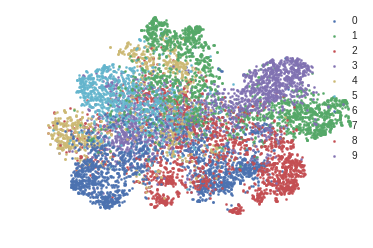

In [0]:
X2 = VisTSNE(X,Y,list(range(10)))

In [0]:
!nvidia-smi

Sun Mar 24 22:23:52 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.43       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    68W / 149W |    467MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  